# Problem Statement:     Predicting Diabetes in Pima Indian Women

## Description:
The Pima Indians Diabetes dataset is a collection of medical data from Pima Indian women in Arizona, USA. This dataset is widely used for the development and evaluation of predictive models to identify individuals at high risk of developing diabetes. The goal of this project is to build a predictive model that can accurately classify individuals as either diabetic or non-diabetic based on a set of medical and demographic features.

## Dataset Details:

The dataset contains the following features:

#### 1.Pregnancies: Number of times pregnant.
#### 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
#### 3. BloodPressure: Diastolic blood pressure (mm Hg).
#### 4. SkinThickness: Triceps skin fold thickness (mm).
#### 5. Insulin: 2-Hour serum insulin (mu U/ml).
#### 6. BMI: Body mass index (weight in kg / (height in m)^2).
#### 7. DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
#### 8. Age: Age in years.
#### 9. Class The binary target variable indicating the presence (1) or absence (0) of diabetes.

# Apply Logistic Regression Model.


In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading the Data set

In [87]:
df=pd.read_csv("C:/Users/tapas/AppData/Local/Temp/Temp12b1e213-4f61-4bb5-bd6a-5594ed3a9ac5_16258311 (3).zip/DS may - 17th Sep/Assignment/pima-indians-diabetes .csv")

In [88]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA Operations

In [89]:
df.set_axis(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class'],axis=1, inplace=True)

In [90]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

In [91]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [92]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Analysing the data 

In [93]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


since min value of "Glucose","BloodPressure","SkinThickness","Insulin", "BMI" is zero but those value can not be zero, so we replace by tham by median 

In [94]:
df.Glucose=df.Glucose.replace(0,df.Glucose.median())
df.BloodPressure=df.BloodPressure.replace(0,df.BloodPressure.median())
df.SkinThickness=df.SkinThickness.replace(0,df.SkinThickness.median())
df.Insulin=df.Insulin.replace(0,df.Insulin.median())
df.BMI=df.BMI.replace(0,df.BMI.median())

In [95]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [96]:
df.Class.value_counts()

0    500
1    268
Name: Class, dtype: int64

In [97]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [98]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


#### All variables are numbers

In [100]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

#### No Missing values in data set

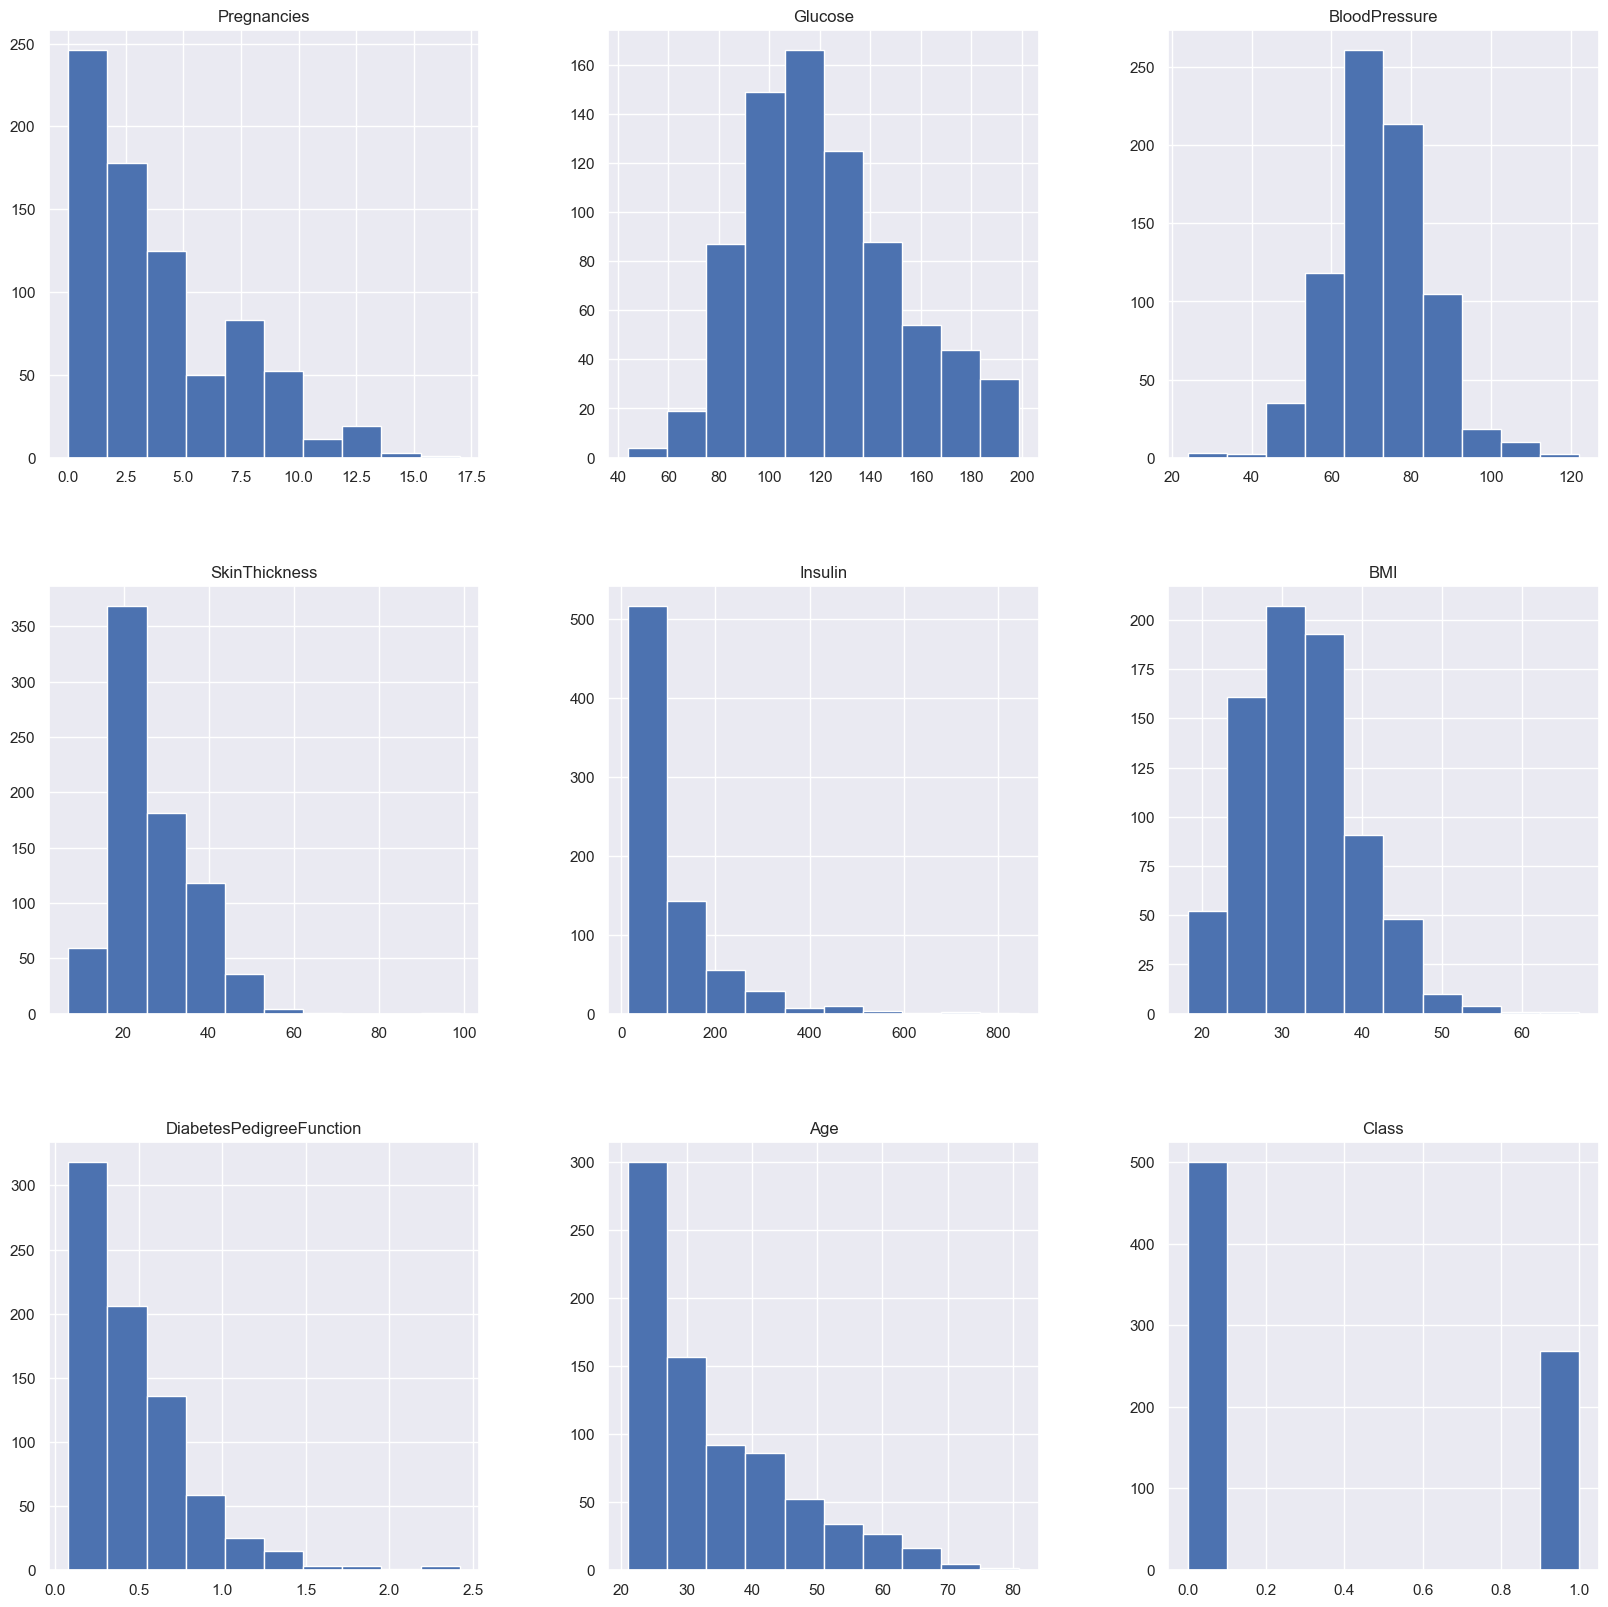

In [101]:
df.hist(figsize=(20,20))
plt.show()

In [102]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.535587
BloodPressure               0.141885
SkinThickness               1.223057
Insulin                     2.693181
BMI                         0.601059
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Class                       0.635017
dtype: float64

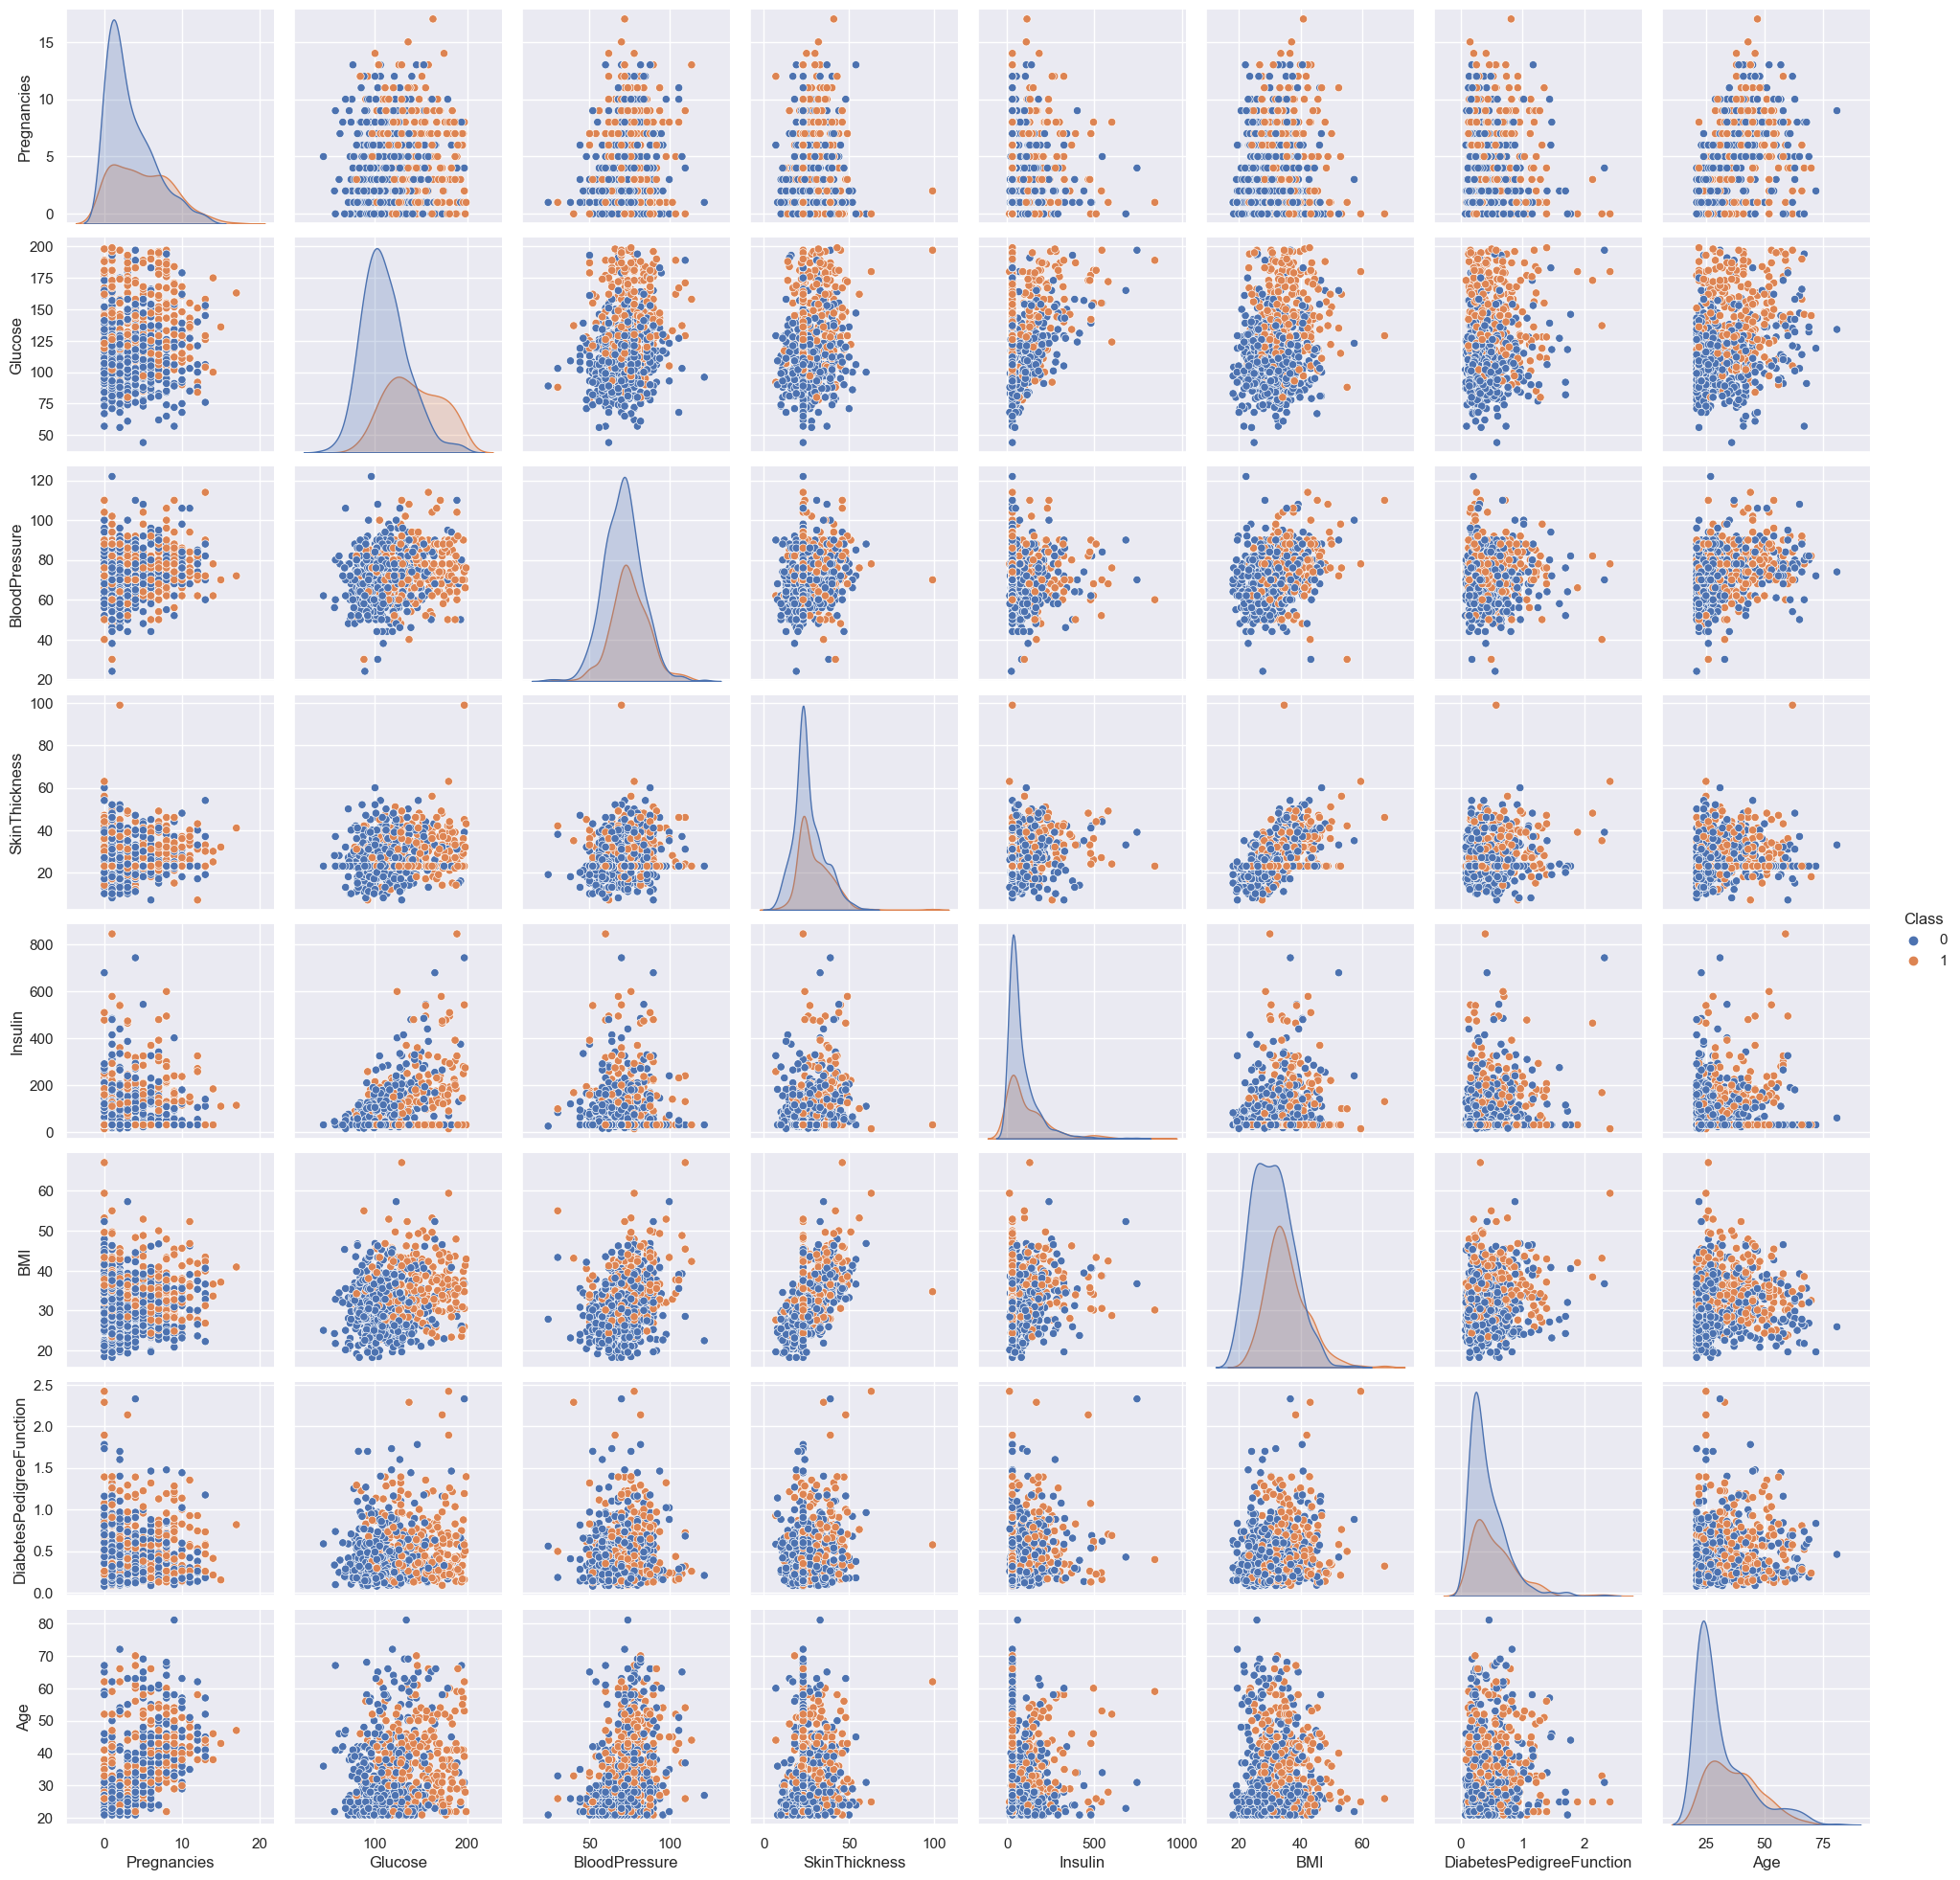

In [103]:
sns.pairplot(hue='Class', data=df)
plt.show()

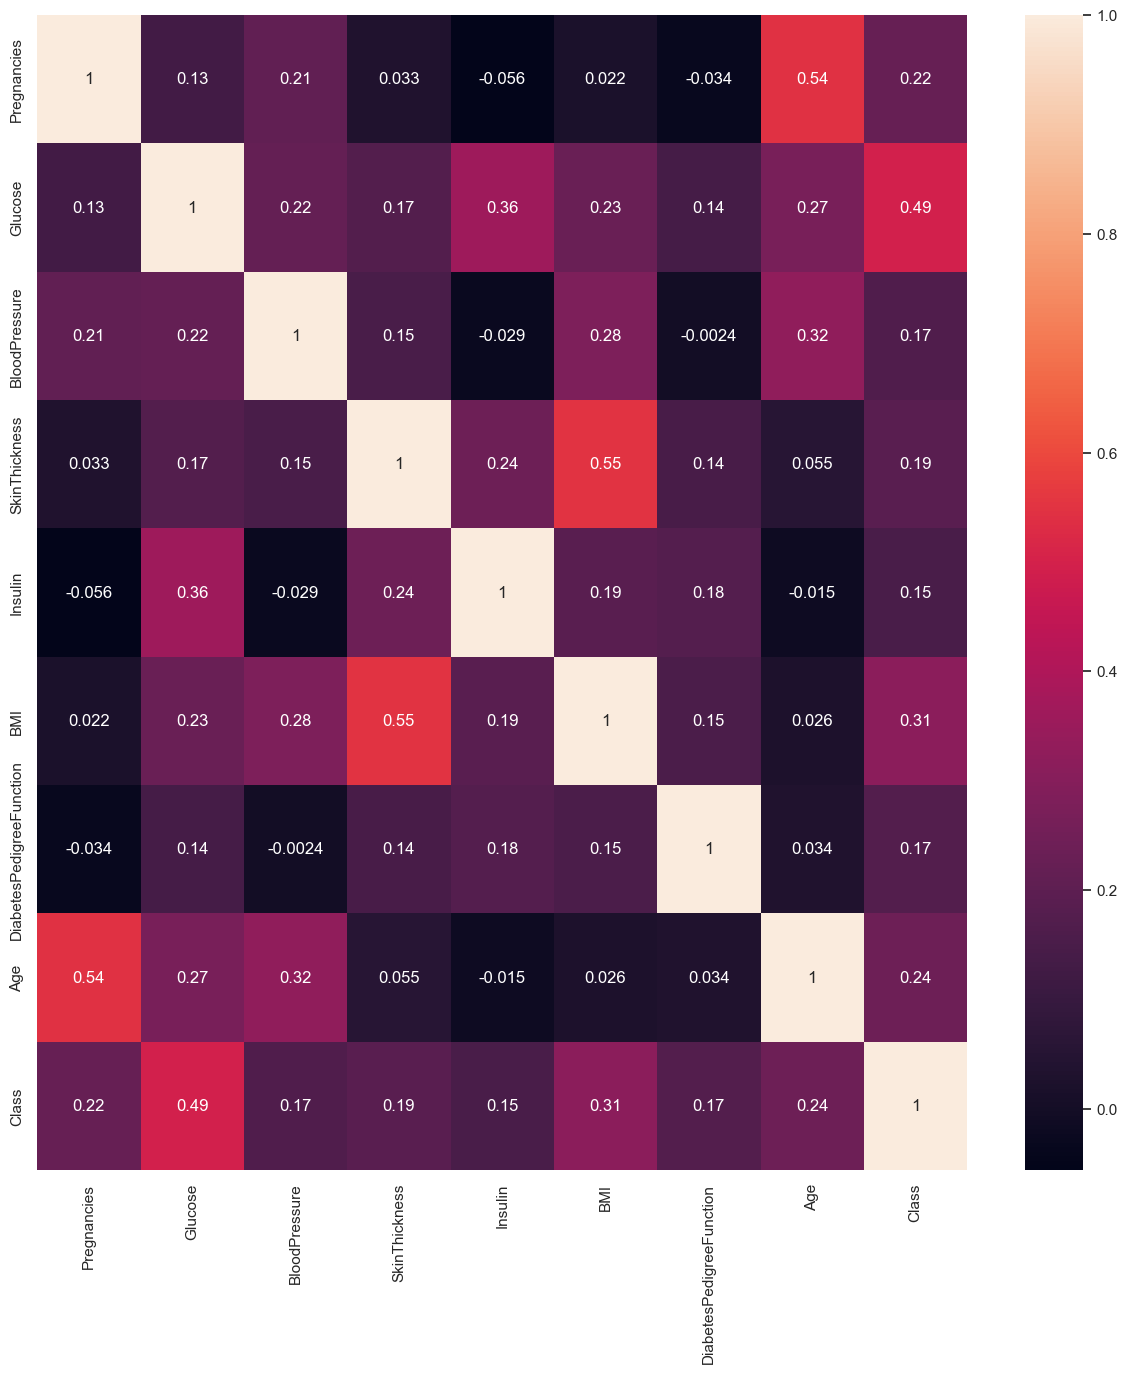

In [104]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [106]:
x=df.drop(['Class'],axis=1)
y=df['Class'].values

In [107]:
x_train, x_test,y_train, y_test = train_test_split(x, y,test_size=0.20,random_state=0)

In [108]:
lo_reg= LogisticRegression(intercept_scaling=0.5,
    random_state=None,
    solver='newton-cg')
lo_reg.fit(x_train, y_train)


LogisticRegression(intercept_scaling=0.5, solver='newton-cg')

In [109]:
lo_reg.score(x_train, y_train)

0.7671009771986971

In [110]:
print("Logistic Regression accuracy : {:.2f}%".format(lo_reg.score(x_test,y_test)*100))

Logistic Regression accuracy : 81.82%
